In [2]:
#Import libraries to read satellite image
import numpy as np
import pandas as pandas
from matplotlib import pyplot as plt
from PIL import Image
import timeit


In [3]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [4]:
import cv2

##Load the data 
Using Image module from Pillow

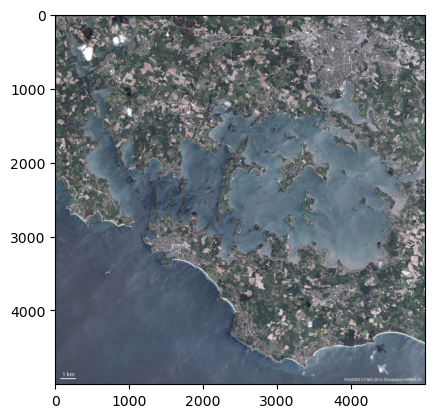

In [5]:
path=r"C:\Users\Admin\OneDrive - Université Bretagne Sud\CLASSES\IMAGE PROCESSING AND ANLYSIS\Data\em_golfe_du_morbihan_20130603.jpg"
Img=np.array(Image.open(path))
plt.imshow(Img)
plt.show()


In [6]:
Img.shape

(4999, 4999, 3)

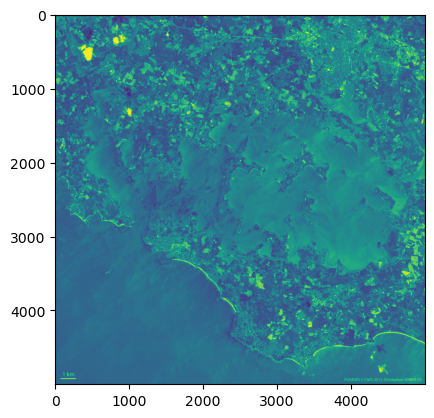

In [7]:
# Convert the image to grayscale (we have a coloured image with 3 bands)
if len(Img.shape) == 3:
    img_gray = np.mean(Img, axis=2) #collapses the three color channels into a single grayscale channel by computing the average intensity value for each pixel.
else:
    img_gray = Img
plt.imshow(img_gray)
plt.show()

Now let us plot a histogram to visualize the pixel count in this image

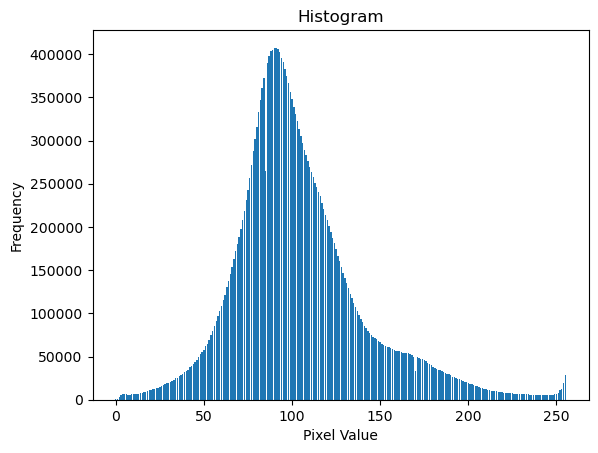

In [8]:
hist=np.histogram(img_gray,256,range=(0,255))[0] #indexing operation that extracts the first element of the result returned by numpy.histogram. The numpy.histogram function returns a tuple containing the histogram values and the bin edges, and [0] is used to access just the histogram values.
plt.bar(range(256), hist)
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.title('Histogram')
plt.show()



In [9]:

#Find the highest and lowest pixel values in the image:

In [10]:
min_pixel_value = np.min(img_gray)
max_pixel_value = np.max(img_gray)

print(f"Lowest Pixel Value: {min_pixel_value}")
print(f"Highest Pixel Value: {max_pixel_value}")

Lowest Pixel Value: 0.0
Highest Pixel Value: 255.0


Image negative

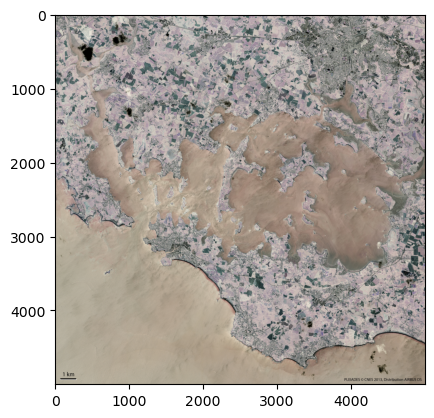

In [11]:
L=255
img_neg=L-Img
plt.imshow(img_neg)
plt.show()

Gamma correction
Test various gamma values, greater than and less than 1. Gamma value= 1 does not change anything
Two approaches are considered: with and without a look up table

In [12]:
#Without look-up table
def gamma_correction_noLUT(image,gamma):
    gamma_corrected1=np.array(255*(image / 255) ** gamma, dtype = 'uint8')
    return gamma_corrected1

def gamma_correction_LUT(image, gamma):
    # build a lookup table mapping the pixel values [0, 255] to
    # their adjusted gamma values
    invGamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** invGamma) * 255
        for i in np.arange(0, 256)]).astype("uint8")
    # apply gamma correction using the lookup table
    return cv2.LUT(image, table)

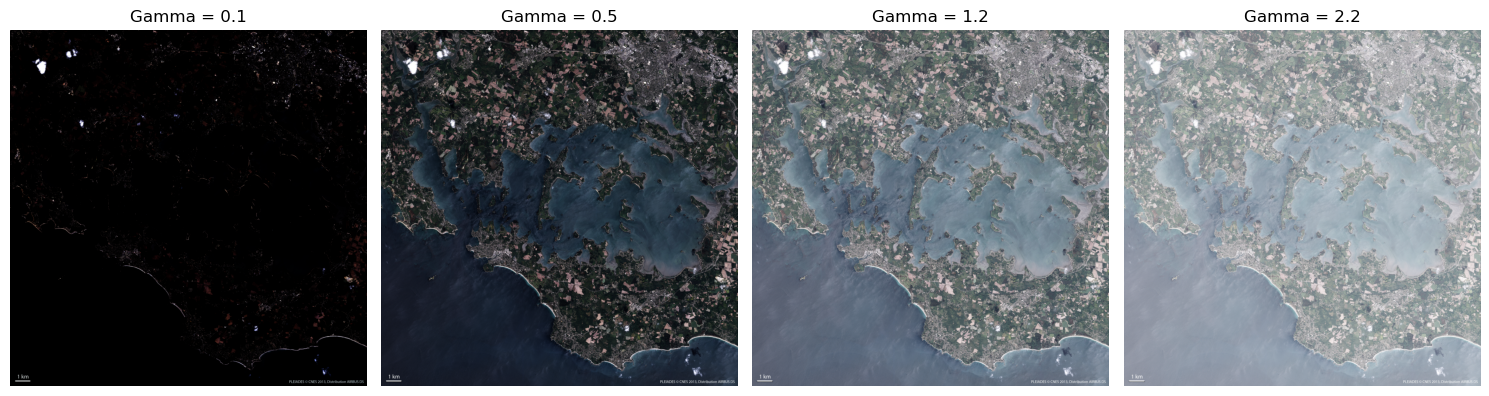

In [13]:

# loop over various values of gamma
images=[]
gammas = [0.1,0.5,1.2,2.2]
#create a figure with subplots
fig,axes=plt.subplots(1,len(gammas),figsize=(15,5))
for i, gamma in enumerate(gammas):
    adjusted = gamma_correction_LUT(Img, gamma=gamma)
    images.append(adjusted)

    # Display the gamma-corrected image for this gamma value
    axes[i].imshow(adjusted, cmap='gray')  # Assuming the images are grayscale
    axes[i].set_title(f'Gamma = {gamma}')
    axes[i].axis('off')
plt.tight_layout()
plt.show()

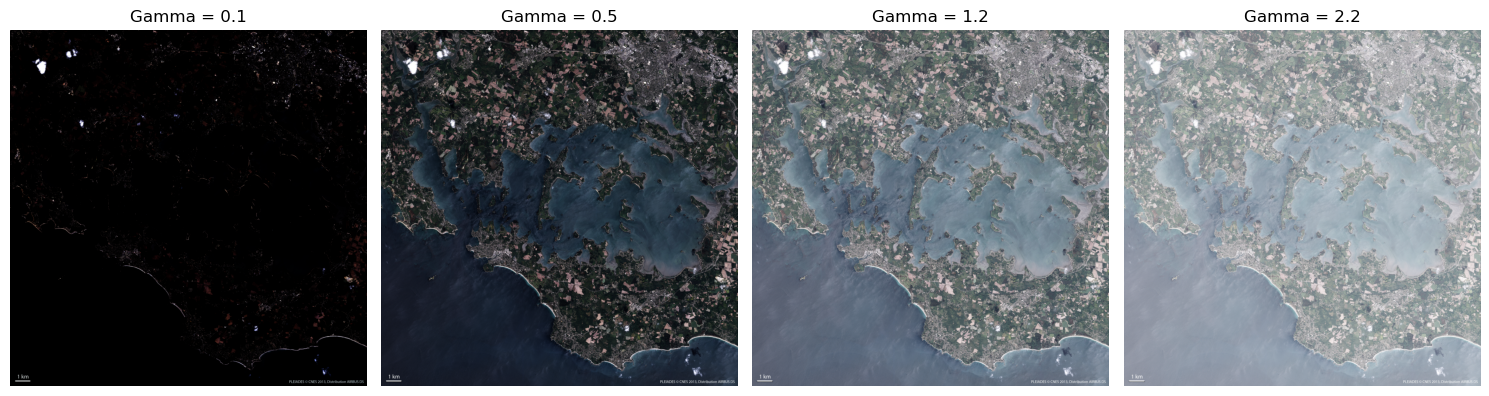

In [14]:
# USING LUT
images=[]
gammas = [0.1,0.5,1.2,2.2]
#create a figure with subplots
fig,axes=plt.subplots(1,len(gammas),figsize=(15,5))
for i, gamma in enumerate(gammas):
    adjusted = gamma_correction_LUT(Img, gamma=gamma)
    images.append(adjusted)

    # Display the gamma-corrected image for this gamma value
    axes[i].imshow(adjusted, cmap='gray')  # Assuming the images are grayscale
    axes[i].set_title(f'Gamma = {gamma}')
    axes[i].axis('off')
plt.tight_layout()
plt.show()

Histogram equalization: flattens the histogram with the goal of improving contrast in an image. Does this by spreading out the most frequent intensity values
We create a look up table that contains the cumulative sum of probabilities for occurrence  of various pixel values

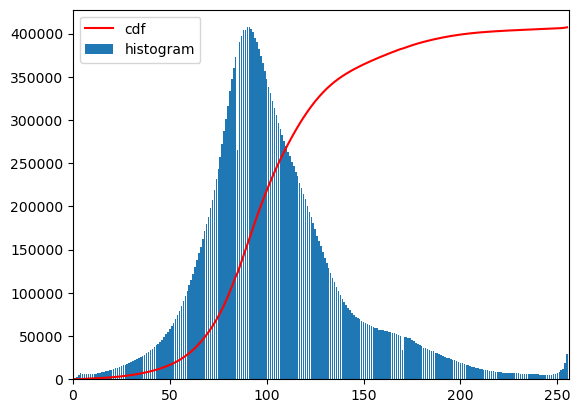

In [22]:

# histogram
hist=np.histogram(img_gray,256,range=(0,255))[0]
#cumulative distribution function:cumulative sum of probabilities using numpy's numpy.cumsum  
cdf=np.cumsum(hist)
#normalize the cdf
cdf_normalized=cdf*hist.max()/cdf.max() #This is the transformation function

#plot the original histogram and cdf
plt.plot(cdf_normalized,color = 'r')
plt.bar(range(256), hist)
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()



In [48]:
#Histogram equalization formula
def histequal(image,L):
    M=image.shape[0]
    N=image.shape[1]
    # histogram
    hist=np.histogram(image,L,range=(0,L-1))[0]
    #cumulative distribution function:cumulative sum of probabilities using numpy's numpy.cumsum  
    cdf=np.cumsum(hist)
    #normalize the cdf
    cdf_normalized=cdf*hist.max()/cdf.max() #This is the transformation function

    #Pixel values that have a zero count are excluded using numpy's numpy.ma.masked_equal
    cdf_m = np.ma.masked_equal(cdf,0)

    #Apply the equalization formula
    cdf_m=(((cdf_m-cdf_m.min())*(L-1))/(cdf_m.max()-cdf_m.min())).astype('uint8')

    #Return input as an array with masked data replaced by a fill value.
    cdf = np.ma.filled(cdf_m,0).astype('uint8')
    New_image=cdf[image]
    return New_image


    
    


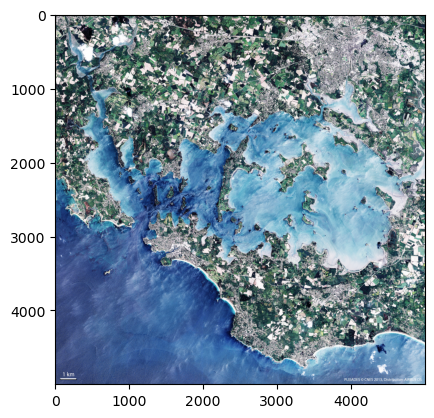

<BarContainer object of 256 artists>

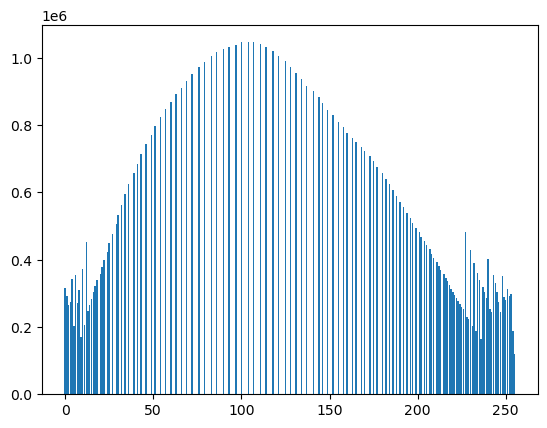

In [49]:
img2=histequal(Img,256)
plt.imshow(img2)
plt.show()
hist=np.histogram(img2,256,range=(0,255))[0]
#plt.plot(cdf,color = 'r')
plt.bar(range(256), hist)

In [61]:
# Check if histeq(negative(image))==negative(histeq(image)).
print(histequal(img_neg,256)==256-img2)


[[[ True  True  True]
  [False False False]
  [False False False]
  ...
  [ True False False]
  [ True False False]
  [False  True  True]]

 [[ True  True  True]
  [False False False]
  [False False False]
  ...
  [ True False False]
  [False False  True]
  [False  True  True]]

 [[False False False]
  [False False False]
  [False False False]
  ...
  [False False False]
  [False False False]
  [ True False False]]

 ...

 [[ True  True False]
  [False False  True]
  [False False  True]
  ...
  [False  True False]
  [False  True False]
  [ True False  True]]

 [[False False  True]
  [False False False]
  [False False False]
  ...
  [False  True False]
  [False  True False]
  [ True False False]]

 [[ True False False]
  [False False False]
  [ True False False]
  ...
  [False False  True]
  [ True  True False]
  [False False False]]]


#Contrast stretching
